In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
from matplotlib.collections import LineCollection

from pivot import metric
from pivot.plot import plot_grid, PivotSpaceVisualizer
from pivot.transform import PivotSpace

In [2]:
pivots = np.asarray([[-0.5,0], [0.5,0]])
piv = PivotSpace(metric.Euclid(),pivots)
viz = PivotSpaceVisualizer(piv, "/fig/")

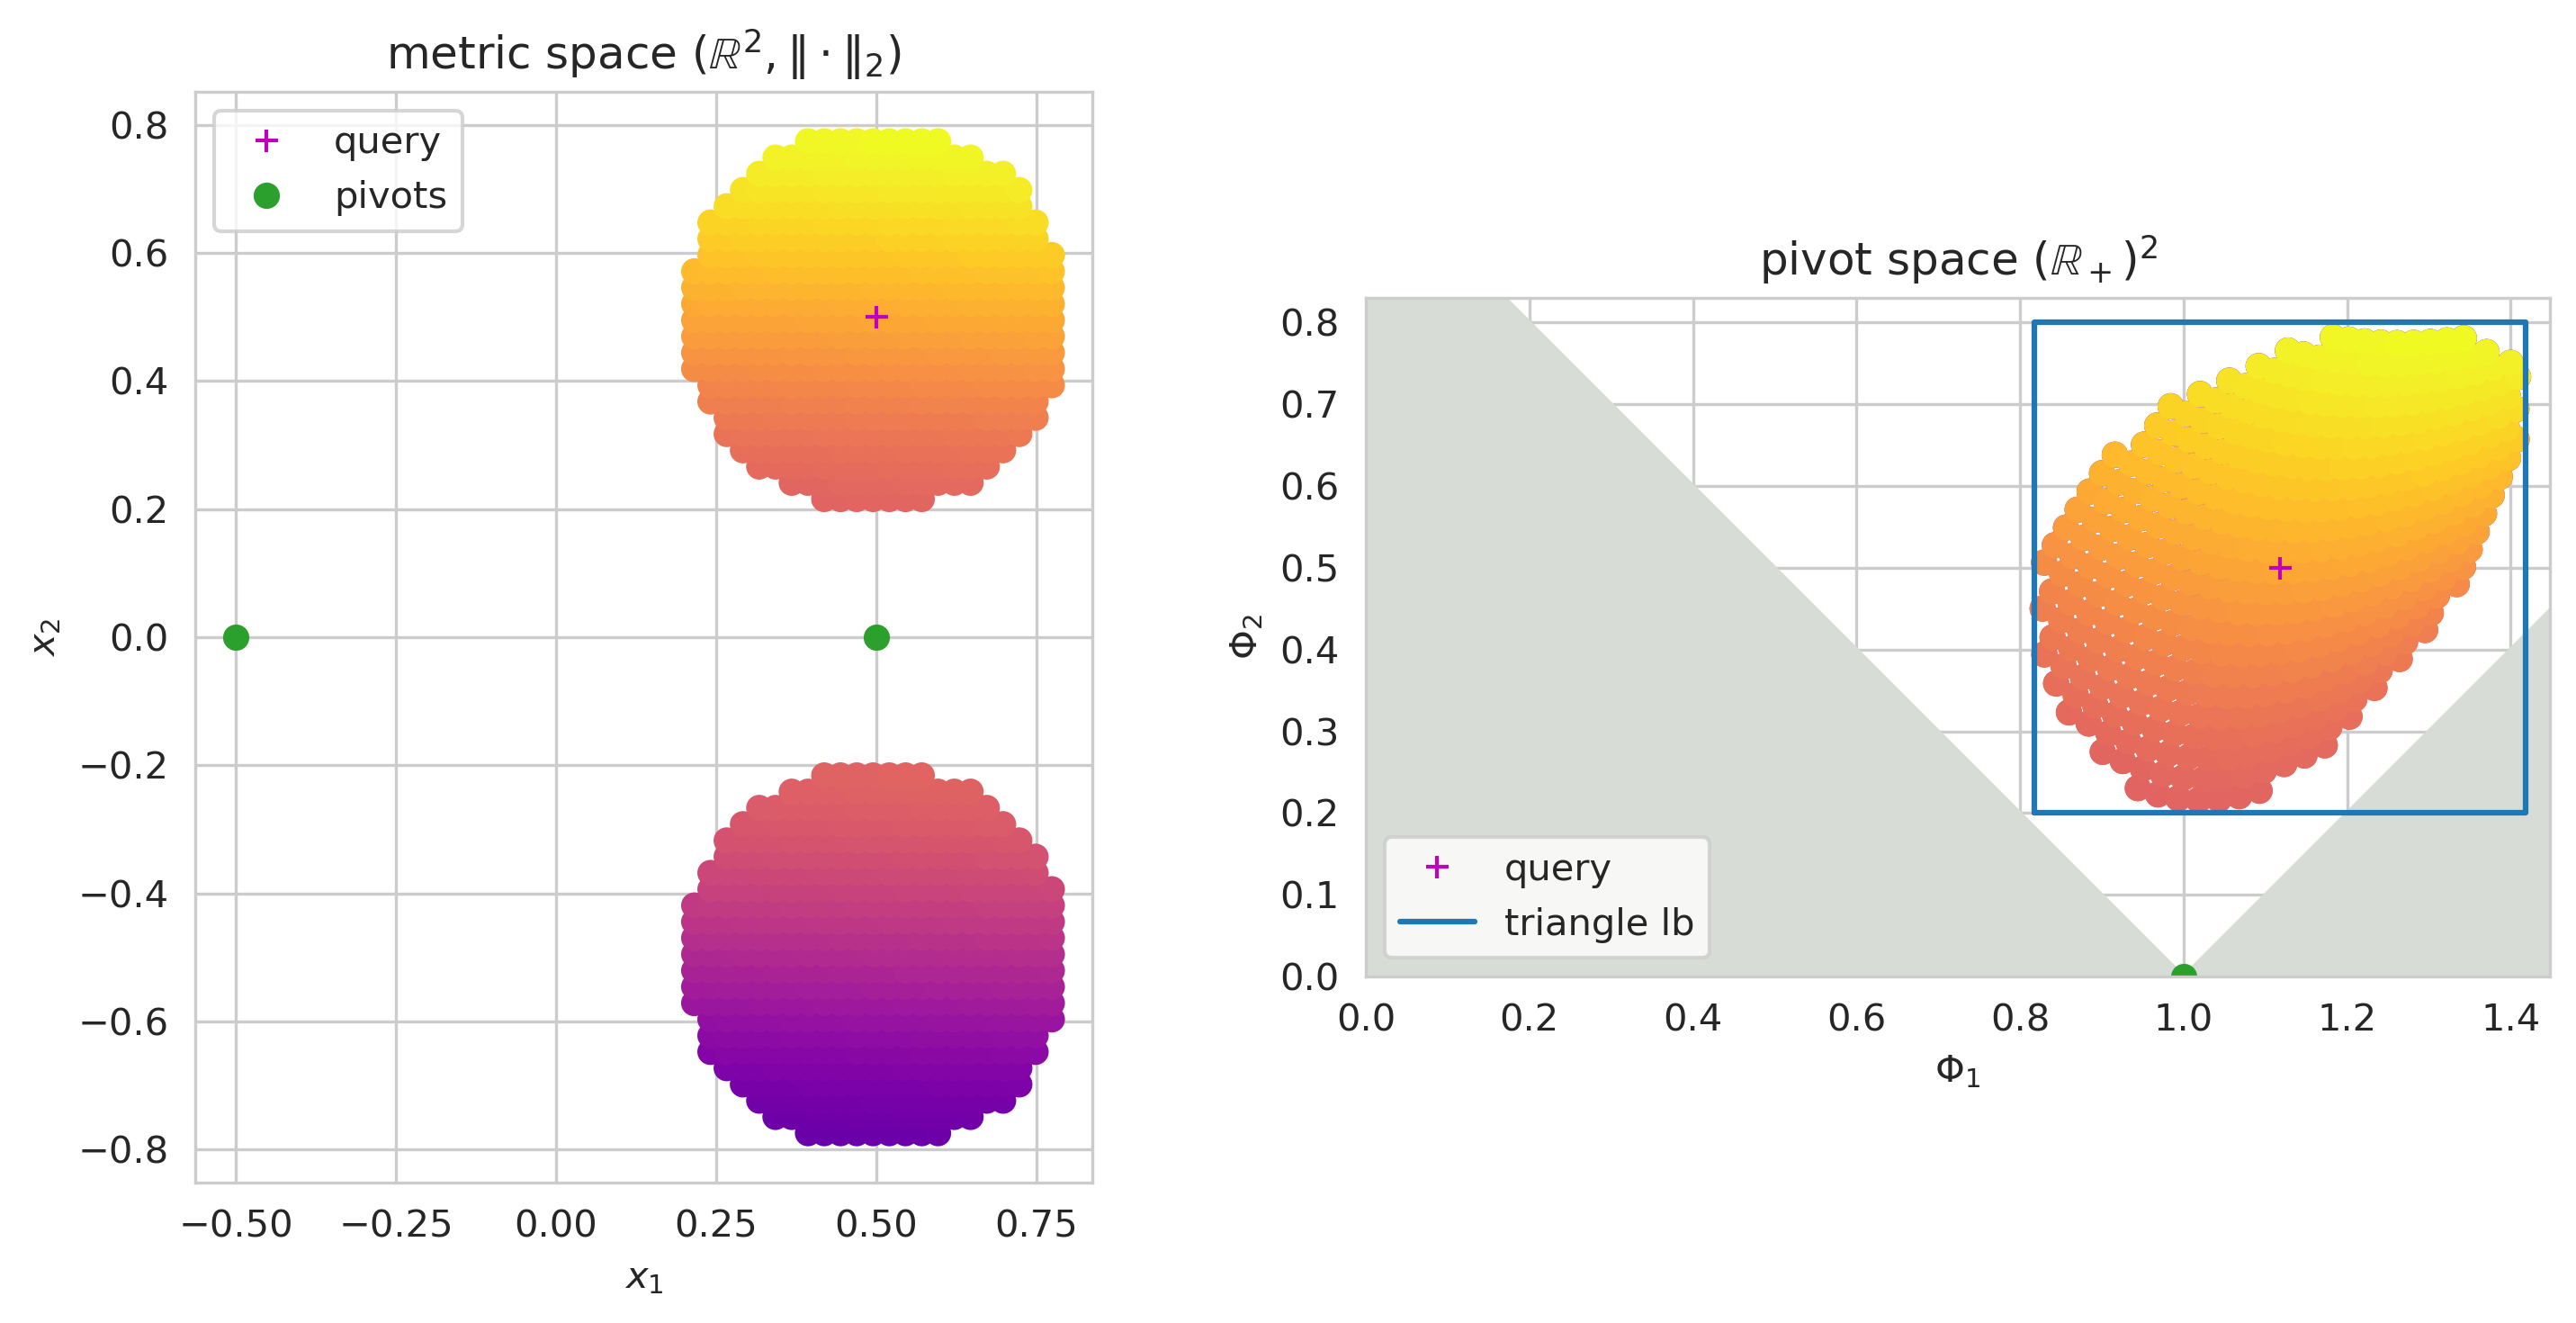

In [5]:
from pivot.generate import hyper_unit_grid
from pivot.query import RangeQuery
from maths.tetrahedron import tetrahedron


points = hyper_unit_grid(2,100000)*8

query = RangeQuery(np.array([0.5,0.5]),0.3,piv)
candidates = query.get_candidates(points,lower_bound="tetrahedron")


def plot_metric(ax):
    plt.plot(*query.center, "m+", label="query")
    plot_colored_points(ax, candidates)

def plot_pivot(ax):
    q_center_t = piv.transform_points(query.center.reshape([1,-1]))
    plt.plot(*q_center_t.T, "m+", label="query")
    plot_colored_points(ax, piv.transform_points(candidates))
    
    r = query.range_
    rectangle = np.array([
            [-r, -r],
            [r, -r],
        [r,r],
        [-r,r],
        [-r,-r],
        ])
    plt.plot(
        *(rectangle + q_center_t).T,
        label="triangle lb"
    )
    plt.legend()


def plot_colored_points(ax, points, cmap=None):
    if cmap is None:
        cmap = mpl.colormaps['plasma']
    colors = cmap(np.linspace(0.2,1, len(points)))
    plt.scatter(*points.T, c=colors)
    
    
    

    
viz.plot(
    "r_2_sin_1.svg",
    lambda ax: plot_metric(ax),
    lambda ax: plot_pivot(ax),
)

In [38]:
pivots = np.asarray([[-0.5,0,0.2], [0.5,0,-0.2]])
piv = PivotSpace(metric.Euclid(),pivots)
query = RangeQuery(np.array([0.5,0.2, 0.3]),0.3,piv)
candidates = query.get_candidates(points,lower_bound="ptolemy")
len(candidates)

ValueError: operands could not be broadcast together with shapes (99856,2) (3,) 

NameError: name 'plot_colored_line' is not defined

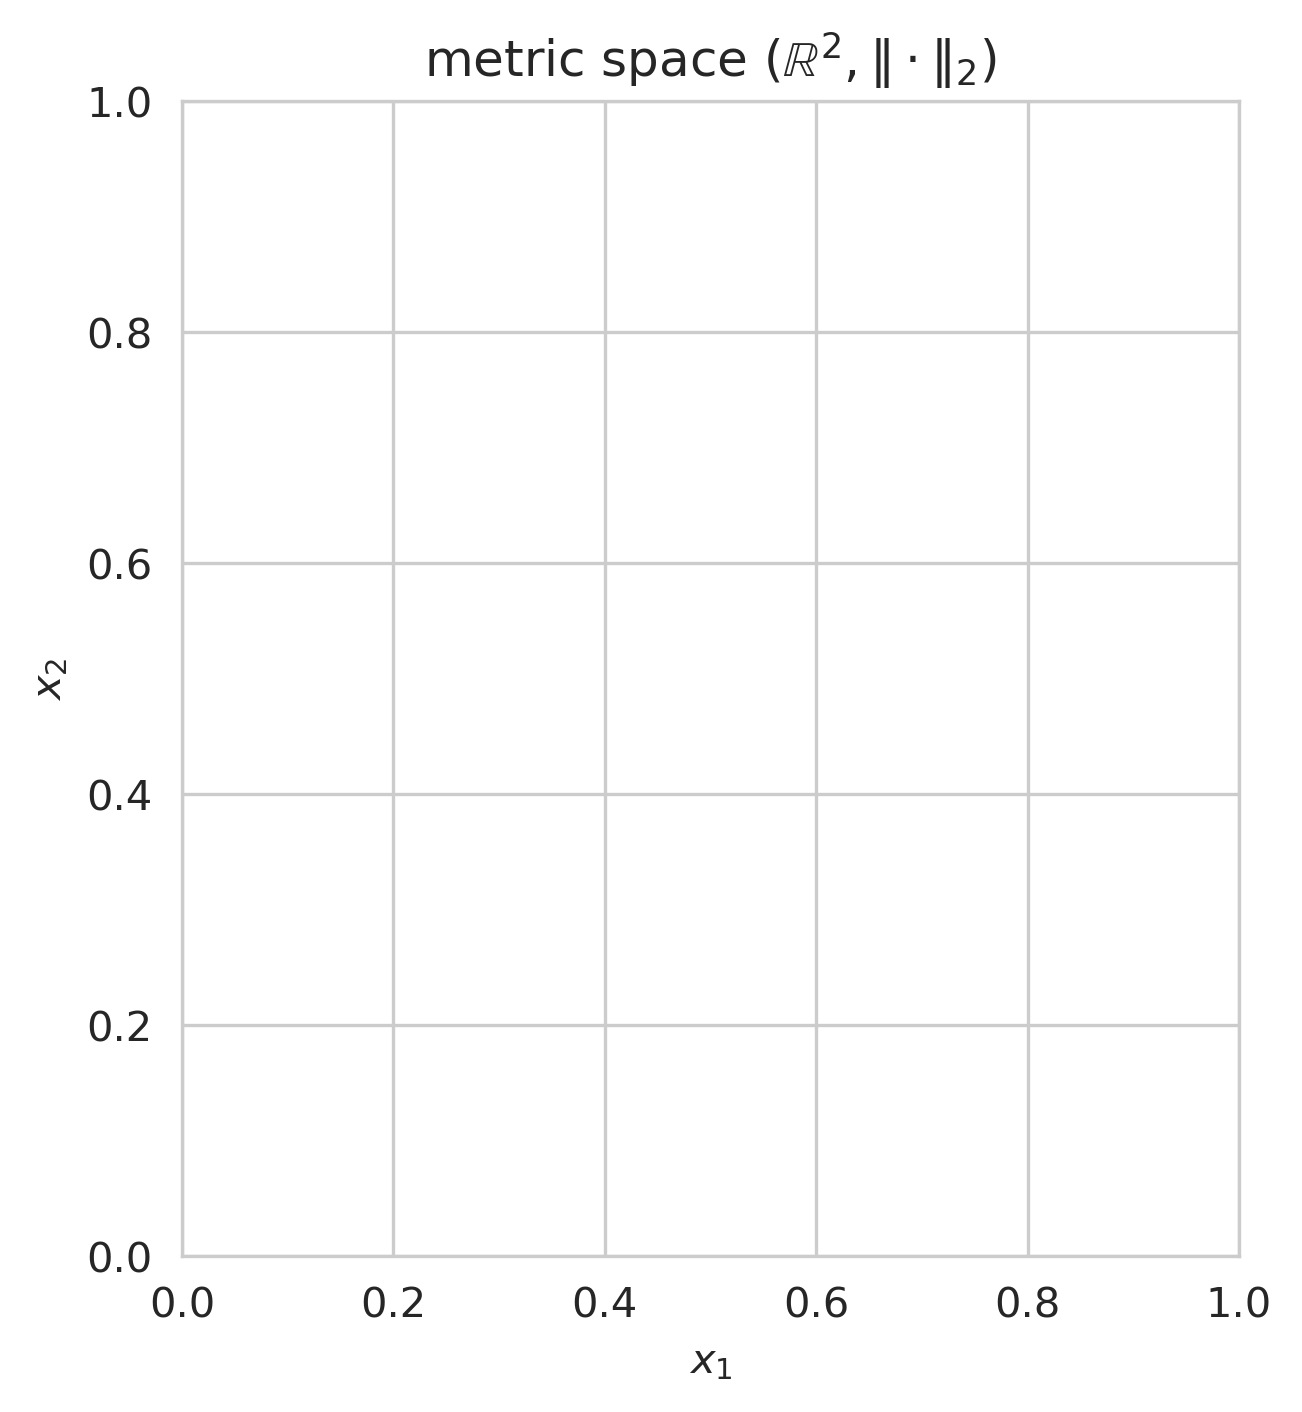

In [6]:
x = np.linspace(0, np.pi * 12, 100)
points = np.array([np.sin(x)/5, x/10-2]).T
p_t = piv.transform_points(points)

viz.plot(
    "r_2_sin_2.svg",
    lambda ax: plot_colored_line(ax, points),
    lambda ax: plot_colored_line(ax, p_t),
)

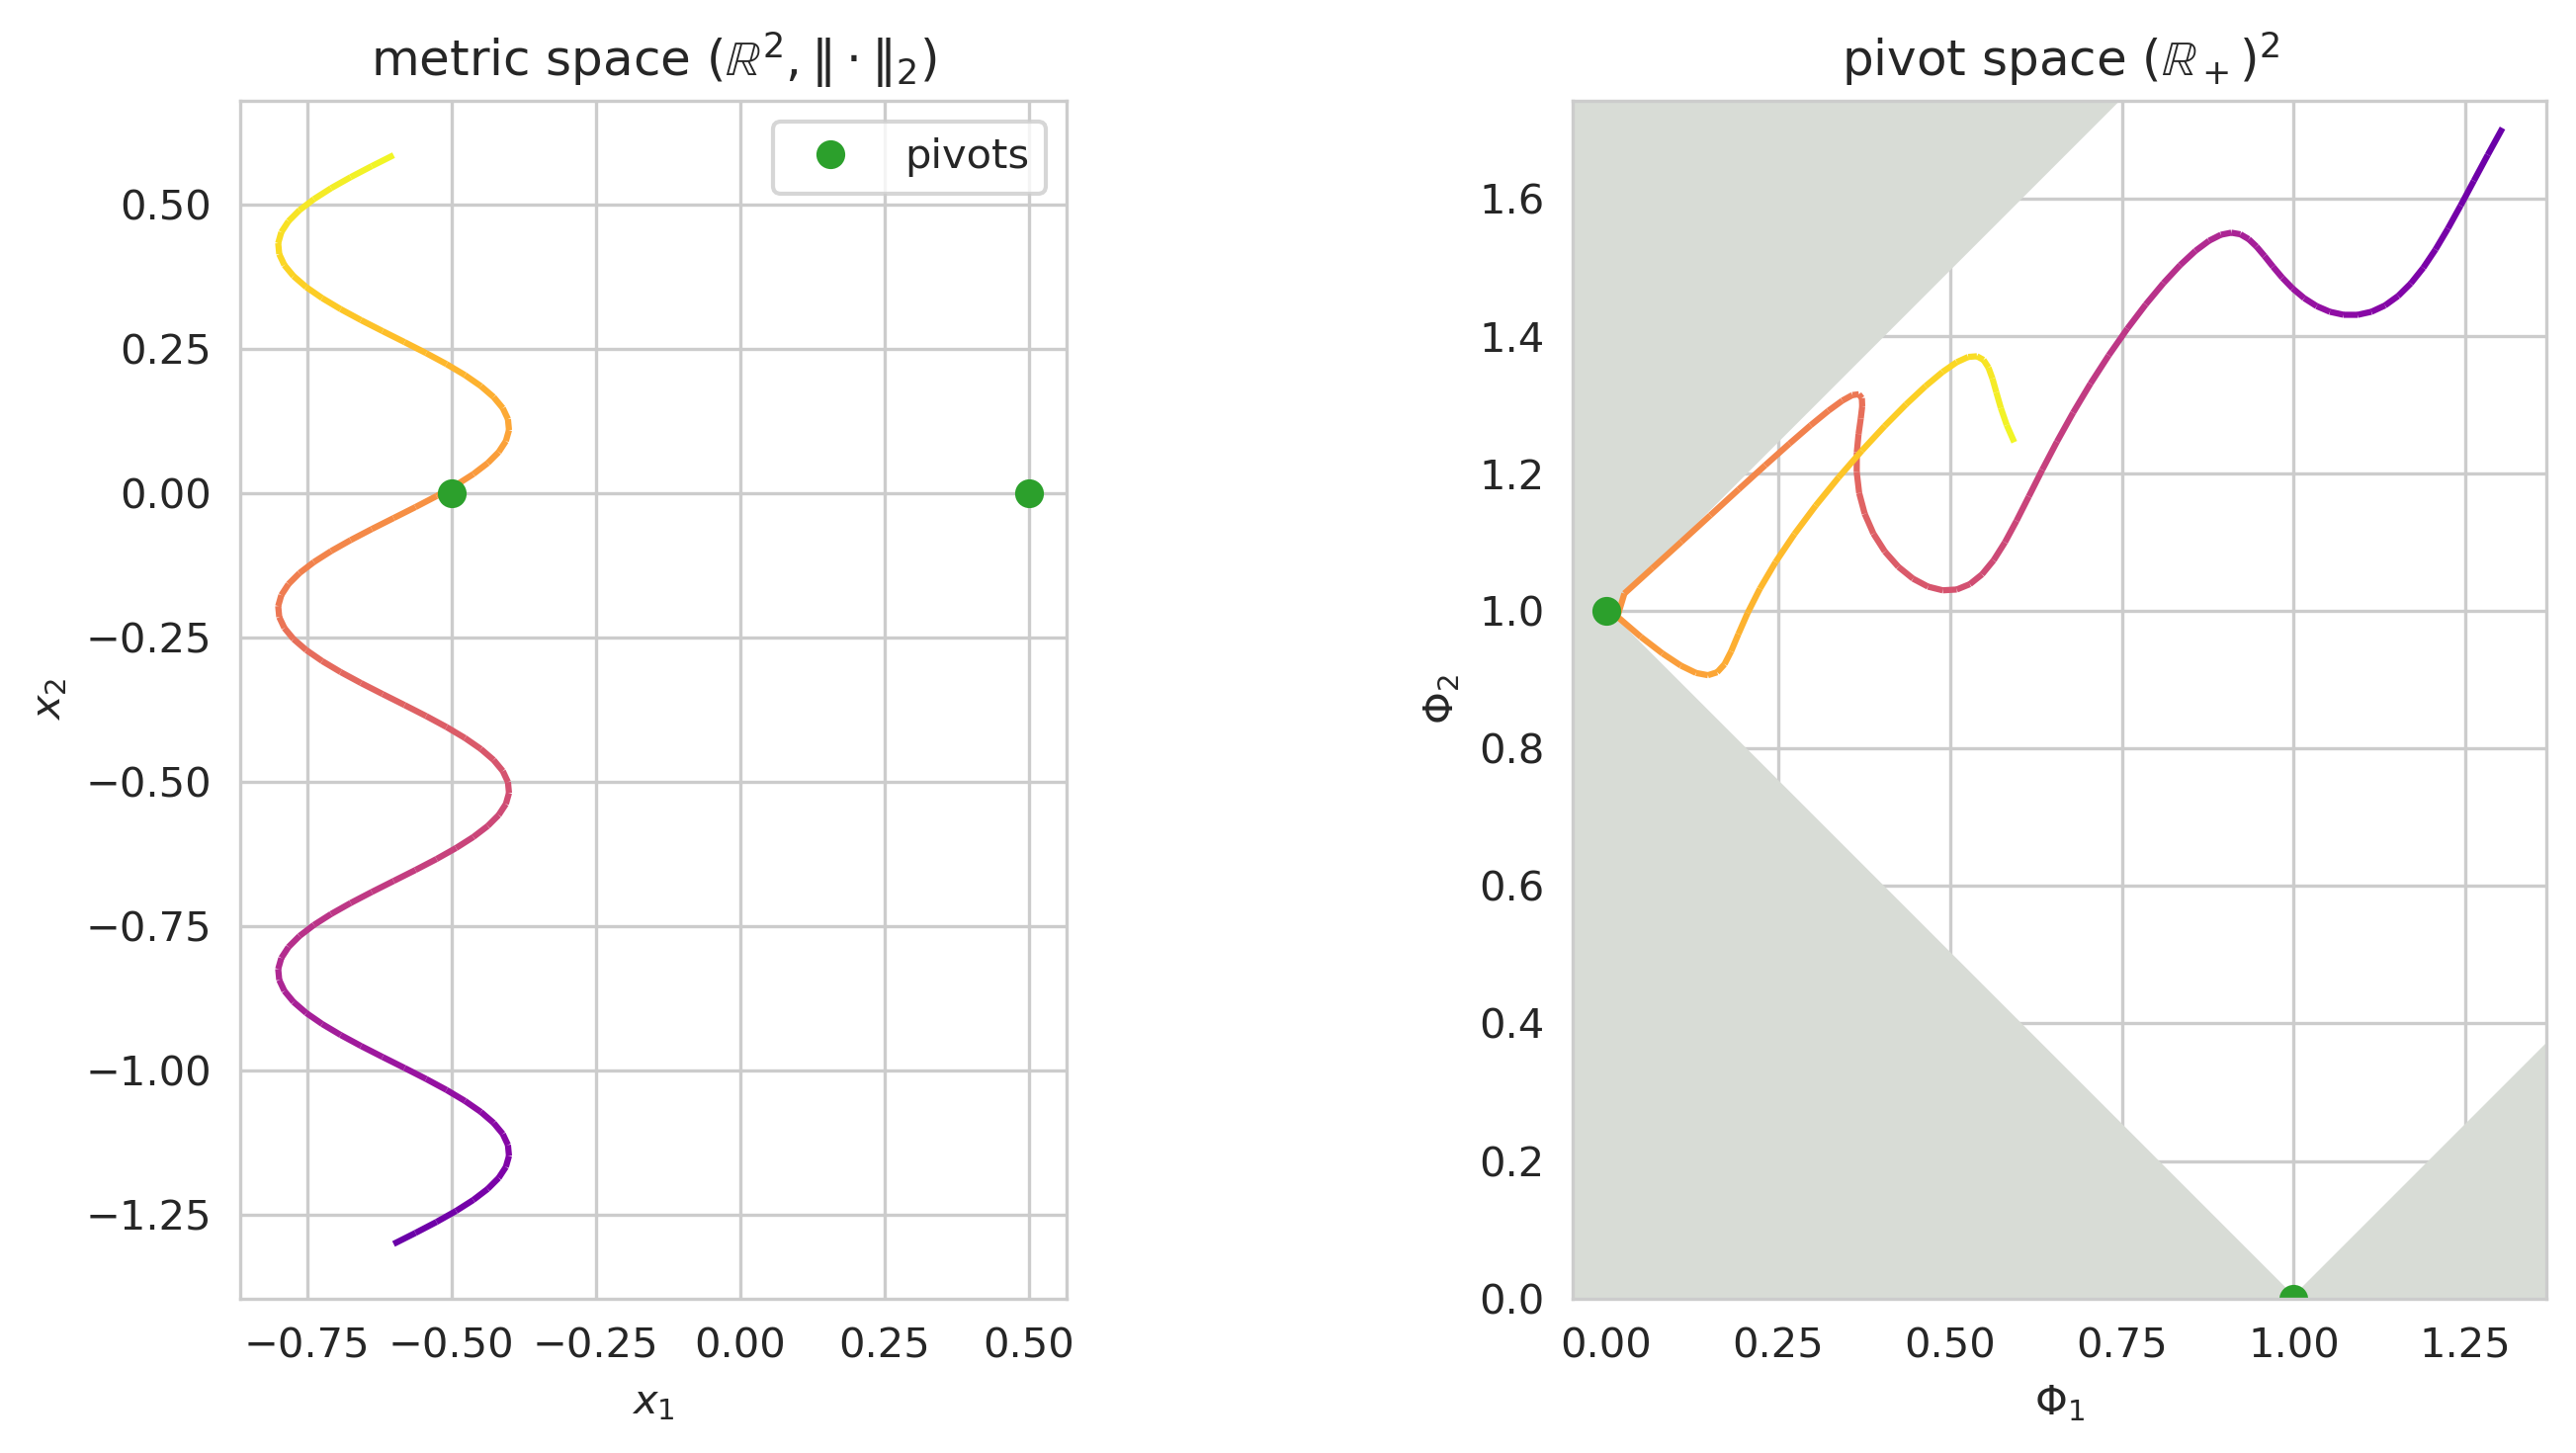

In [6]:
x = np.linspace(0, np.pi * 6, 100)
points = np.array([np.sin(x)/5-0.6, x/10-1.3]).T
p_t = piv.transform_points(points)

viz.plot(
    "r_2_sin_3.svg",
    lambda ax: plot_colored_line(ax, points),
    lambda ax: plot_colored_line(ax, p_t),
)

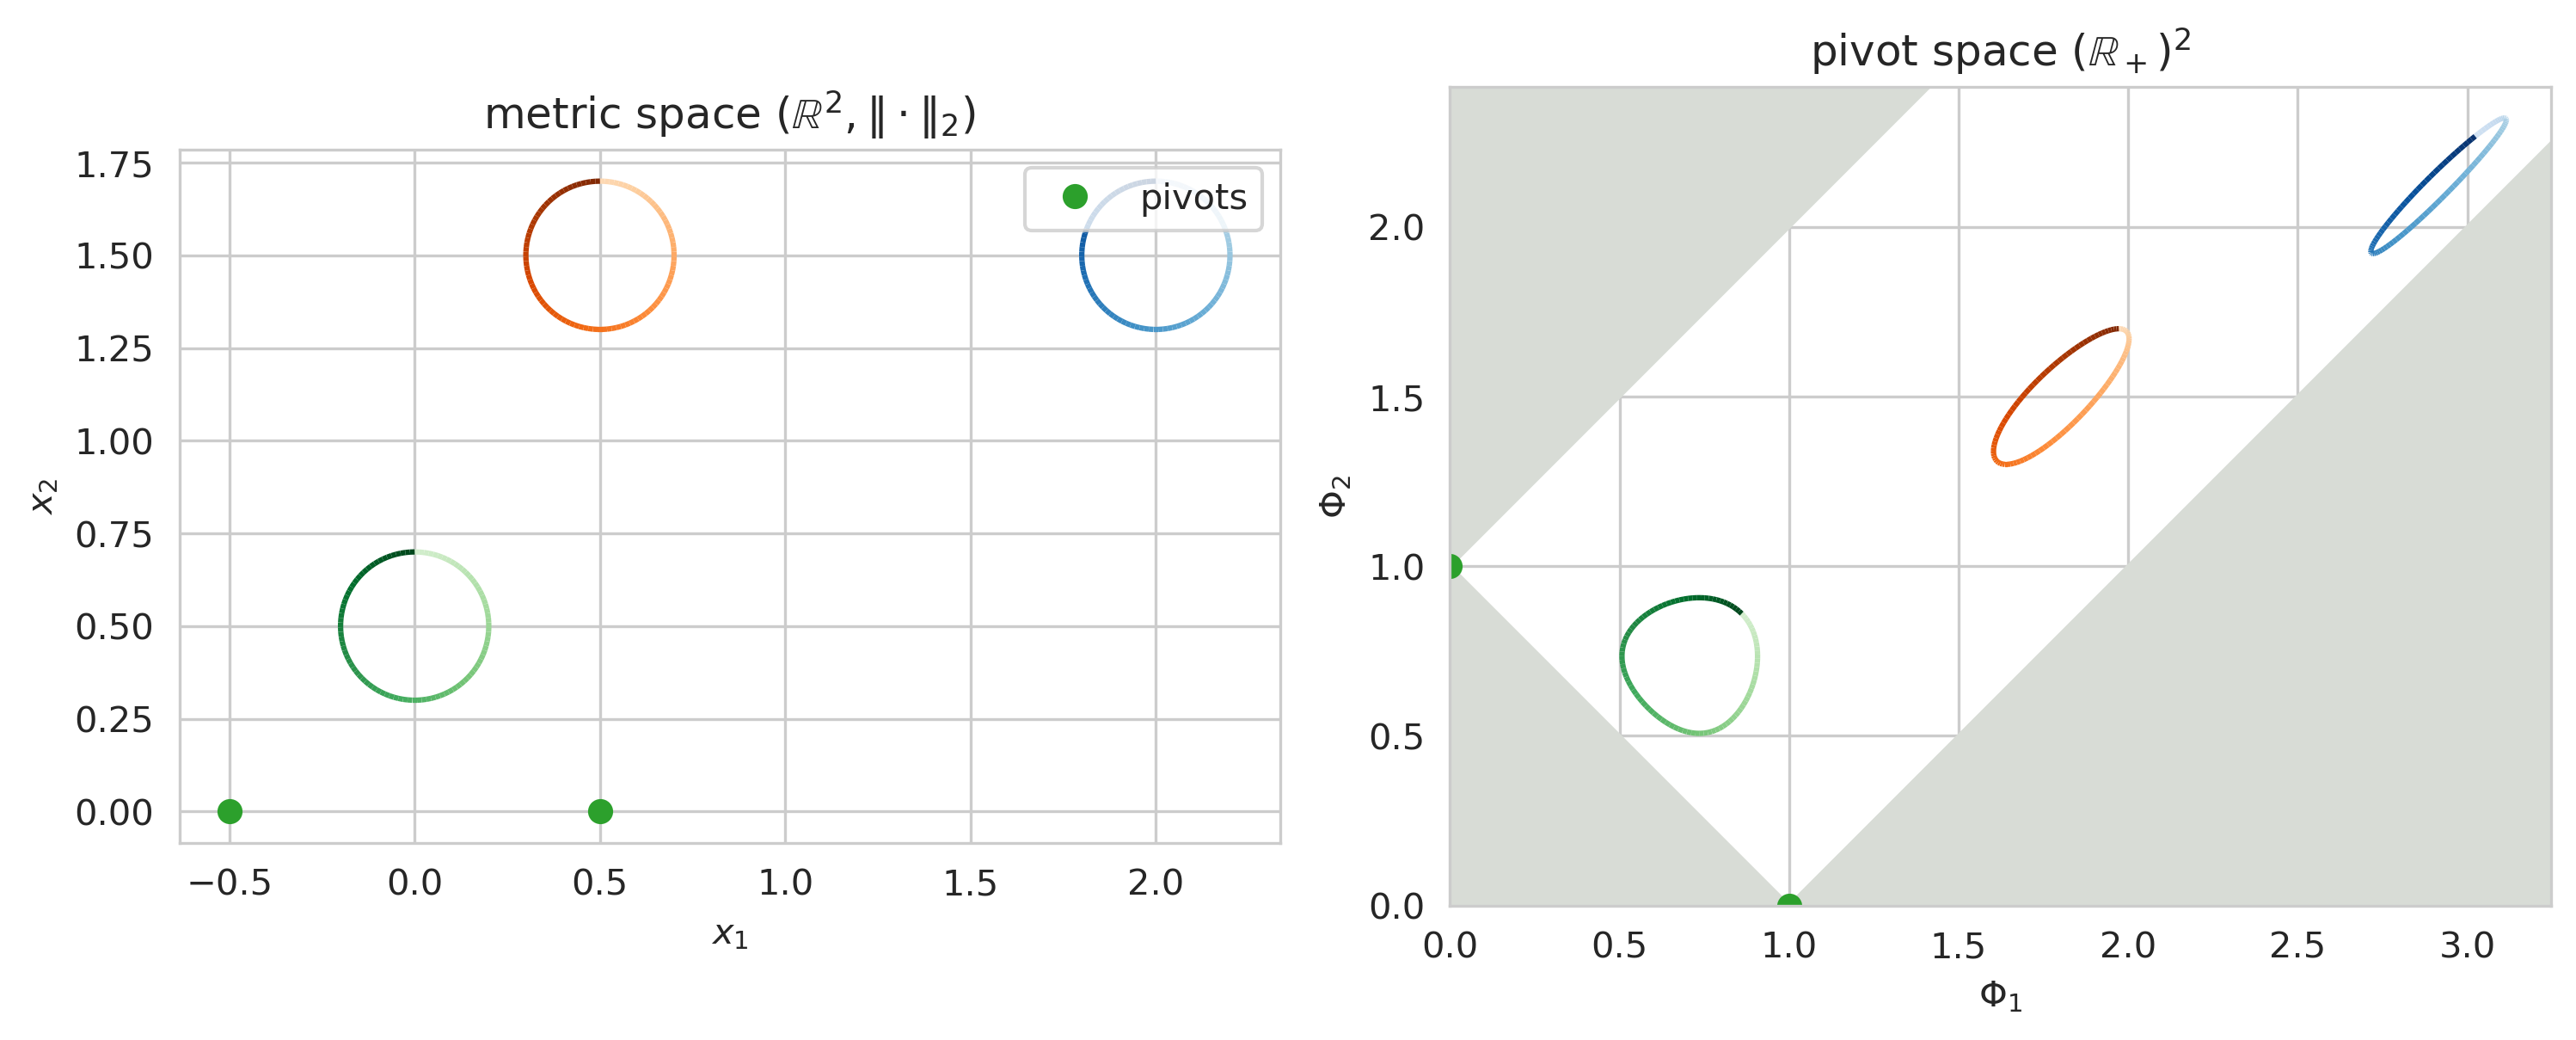

In [7]:
def get_circle(center=(1,2)):
    center = np.array(center)
    x = np.linspace(0, np.pi * 2, 100)
    r = 0.2
    points = center + np.array([r*np.sin(x), r*np.cos(x)]).T
    points_transformed = piv.transform_points(points)
    return points, points_transformed

cmaps = ["Blues","Oranges","Greens"]
cmaps = [mpl.colormaps[c] for c in cmaps]
circles = [
    get_circle((2,1.5)),
    get_circle((0.5,1.5)),
    get_circle((0,0.5)),
]

def plot_metric_s(ax):
    for (points,_),cmap in zip(circles, cmaps):
        plot_colored_line(ax, points, cmap)

def plot_pivot_s(ax):
    for (_,points_transformed),cmap in zip(circles, cmaps):
        plot_colored_line(ax, points_transformed, cmap)

viz.plot(
    "r_2_queries.svg",
    plot_metric_s,
    plot_pivot_s,
)